<a href="https://colab.research.google.com/github/YashrajMishra6190/DATASETS/blob/main/TitanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction To Titanic DataSet Analysis
---
## Dataset Description
Overview
The data has been split into two groups:

training set `(train.csv)`

test set `(test.csv)`

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The `test set` should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

`Data Dictionary`

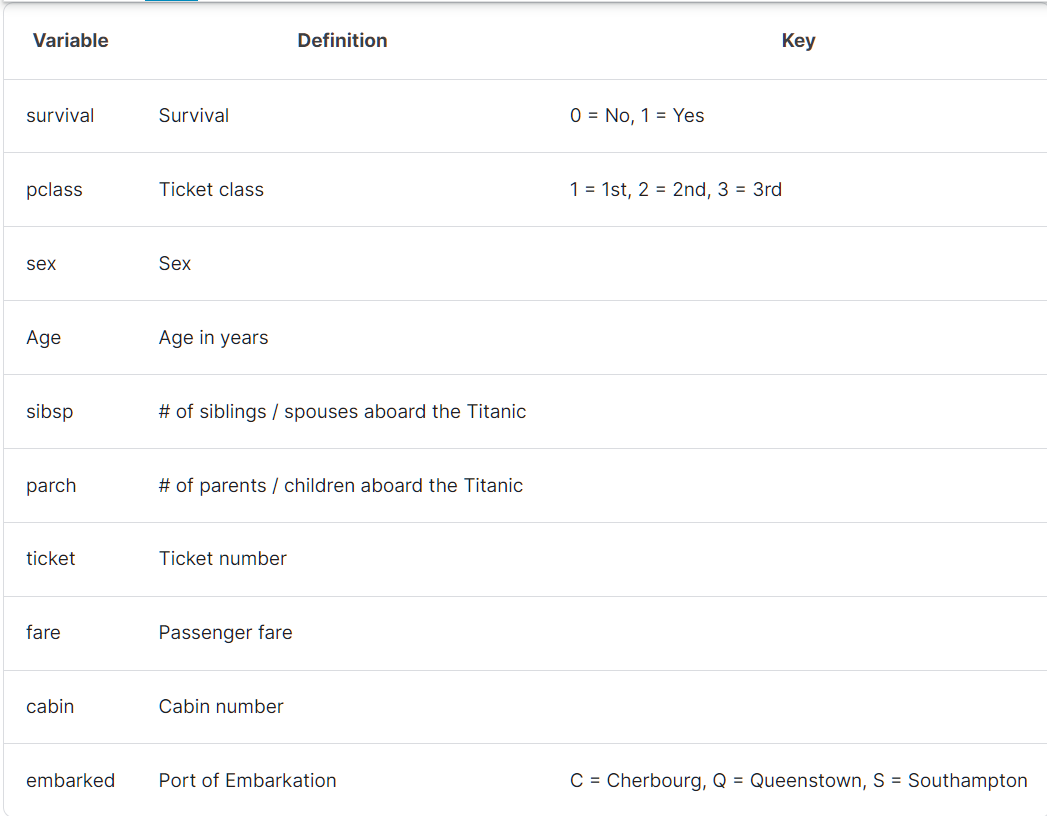

`Variable Notes`

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in
the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


# Objective


---

To figure out with the respect of PassengerId is that Passenger is Survived or not.

# Importing The Basic Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# to ignore the warnings
warnings.filterwarnings('ignore')

# Load Data Sets

In [2]:
#Loading the train dataset
train = pd.read_csv('https://raw.githubusercontent.com/YashrajMishra6190/DATASETS/main/train.csv')
#loading the test dataset
test = pd.read_csv('https://raw.githubusercontent.com/YashrajMishra6190/DATASETS/main/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- To get the statistical information of the train dataset like min,max, count , mean etc. use describe()

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#lets get the data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis -- Visulaization

In [11]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

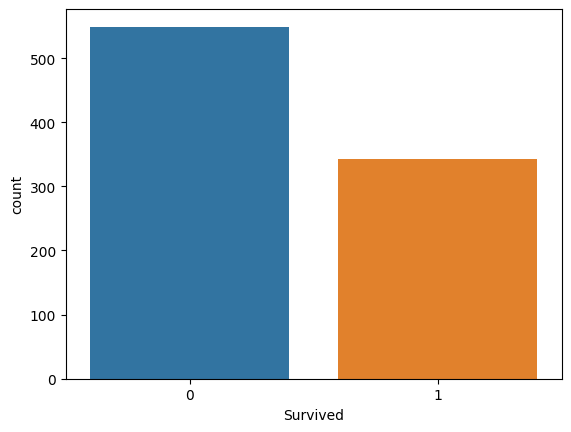

In [16]:
sns.countplot(x = train['Survived'])
plt.show()

In [20]:
#Now let us visualize the passenger class
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

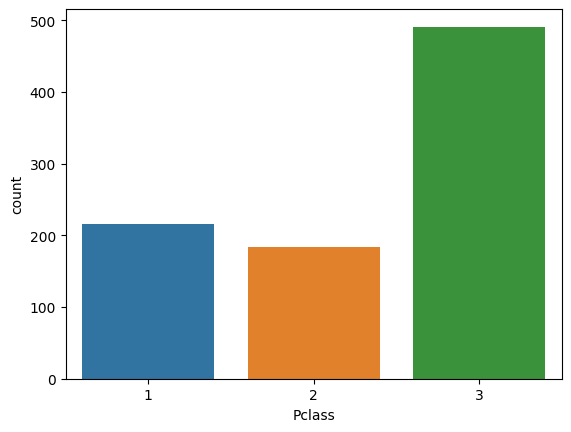

In [21]:
sns.countplot(x = train['Pclass'])
plt.show()

In [22]:
# Visualizing the sex ratio
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

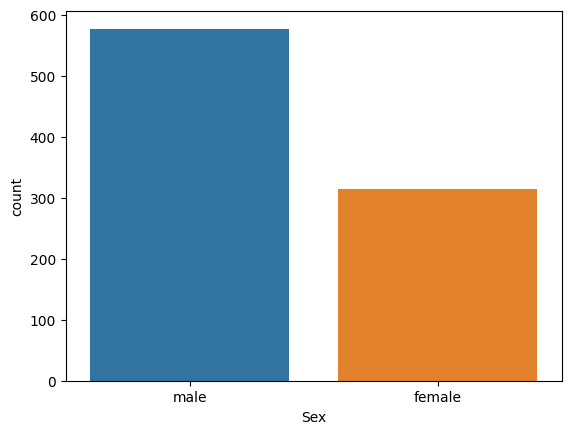

In [23]:
sns.countplot(x = train['Sex'])
plt.show()

In [24]:
#Also Visualizing the SibSp : Sibbling or spouse
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

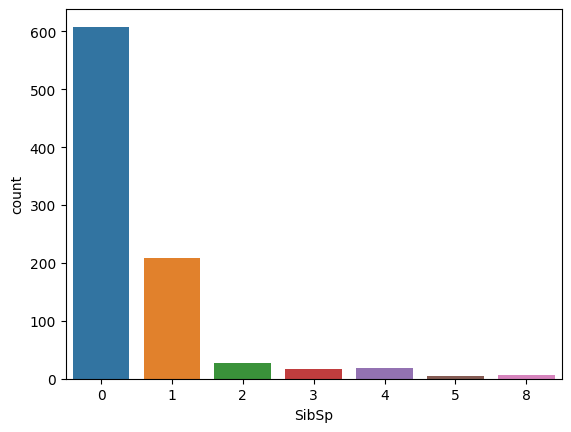

In [25]:
#Most of the person doesnt have Sibling or Spouse
sns.countplot(x = train['SibSp'])
plt.show()

In [26]:
# Visulaizing family realtion : parch
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

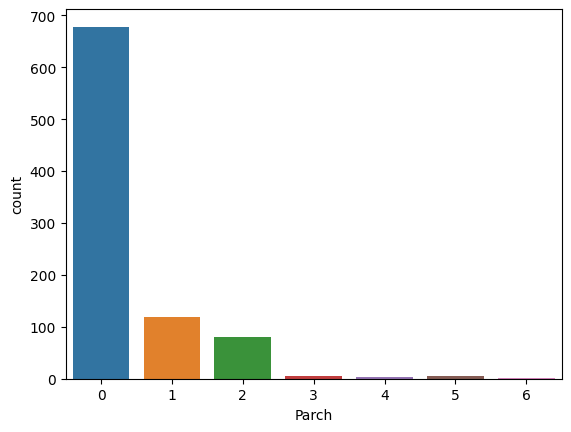

In [27]:
sns.countplot(x = train['Parch'])
plt.show()

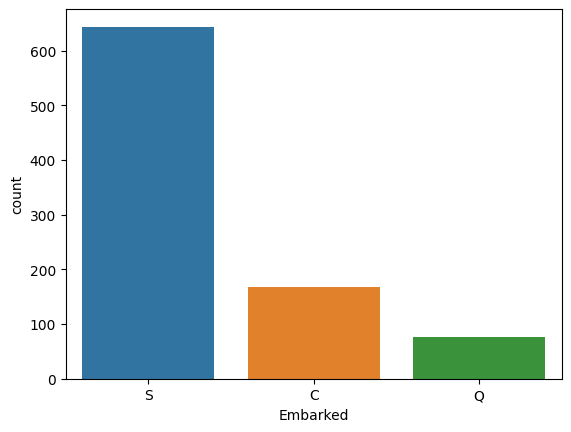

In [28]:
#Visulaizing the Embarked
sns.countplot(x = train['Embarked'])
plt.show()

`Numeric Attributes`

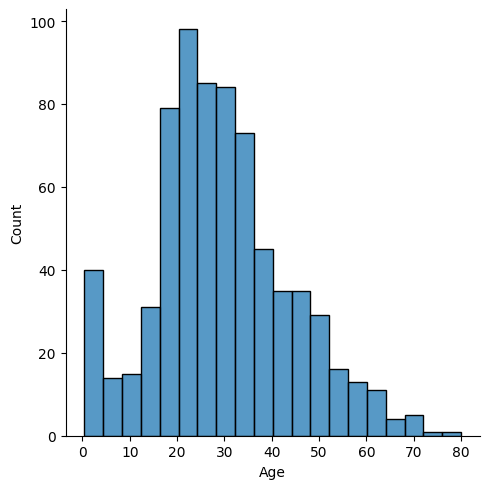

In [31]:
# Visulaizing the Age block
sns.displot(train['Age'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

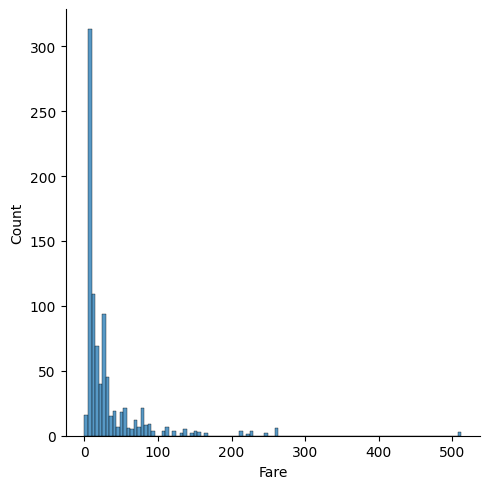

In [32]:
# Visulaization the Fare block
sns.displot(train['Fare'])
plt.show

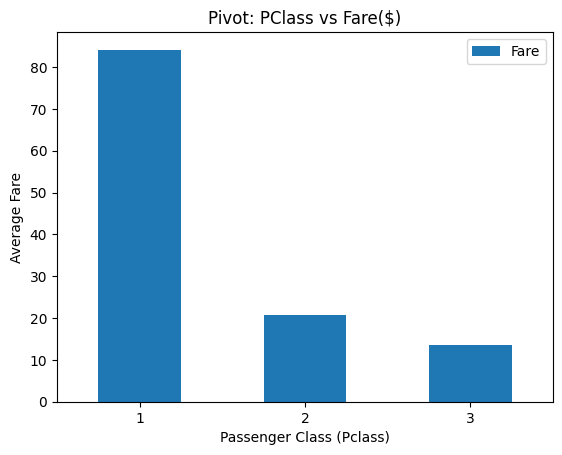

In [34]:
fare_class = train.pivot_table(index = 'Pclass', values = 'Fare')
fare_class.plot(kind='bar')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.xticks(rotation = 0)
plt.title('Pivot: PClass vs Fare($)')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

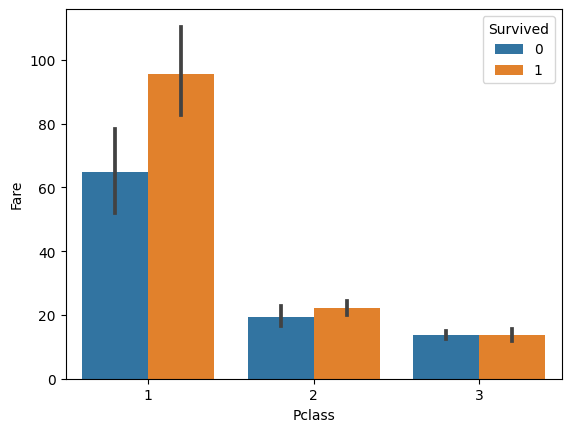

In [73]:
sns.barplot(data=train, x = 'Pclass' , y = 'Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

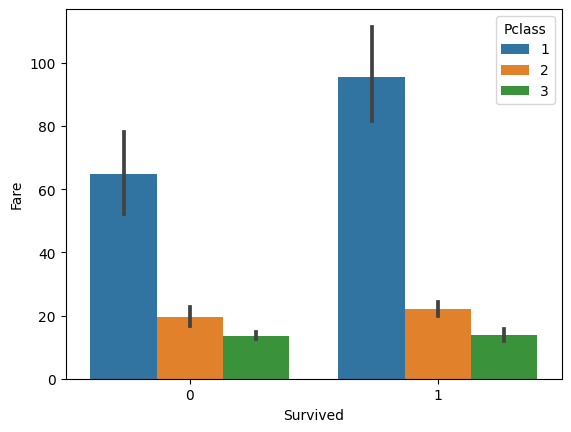

In [74]:
sns.barplot(data=train, x = 'Survived' , y = 'Fare', hue='Pclass')

# Data Preprocessing

`Combining the train and test data`

In [58]:
train_len = len(train)
#combining the two df
df = pd.concat([train,test], axis = 0)
df = df.reset_index(drop = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.shape

(1309, 12)

In [60]:
#checking the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

As we can see that the data frame column cabin has so many null values so, `Removing the Cabin Column`

In [61]:
df = df.drop(columns = ['Cabin'], axis = 1)

In [62]:
df.shape

(1309, 11)

Filling the numeric values with mean of each column of the dataframe

In [63]:
df['Age'].mean()

29.881137667304014

In [64]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [65]:
#similarly for the fare
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

Filling the categorical values with mode of each column of the dataframe

In [66]:
df["Embarked"].mode()[0]

'S'

In [67]:
# Embarked
df['Embarked'] = df['Embarked'].fillna(df["Embarked"].mode()[0])

In [68]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# Log Transformation for uniform data distribution of the datset

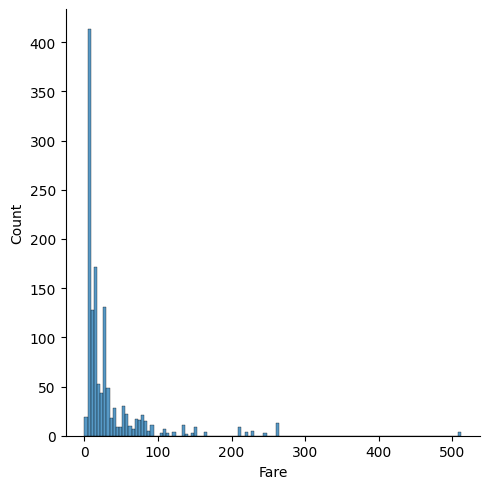

In [69]:
sns.displot(df['Fare'])
plt.show()

In [70]:
df['Fare'] = np.log(df['Fare']+1) # to avoid the error whenever the Fare is zero so always add with 1

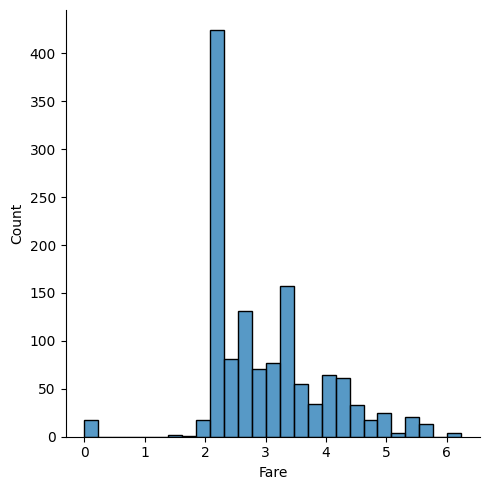

In [71]:
sns.displot(df['Fare'])

# Correlation Matrix

---
A correlation matrix is a square matrix showing the correlation coefficients between two variables. Correlation coefficients measure how strong and in which direction two variables are linked in a straight line.


<Axes: >

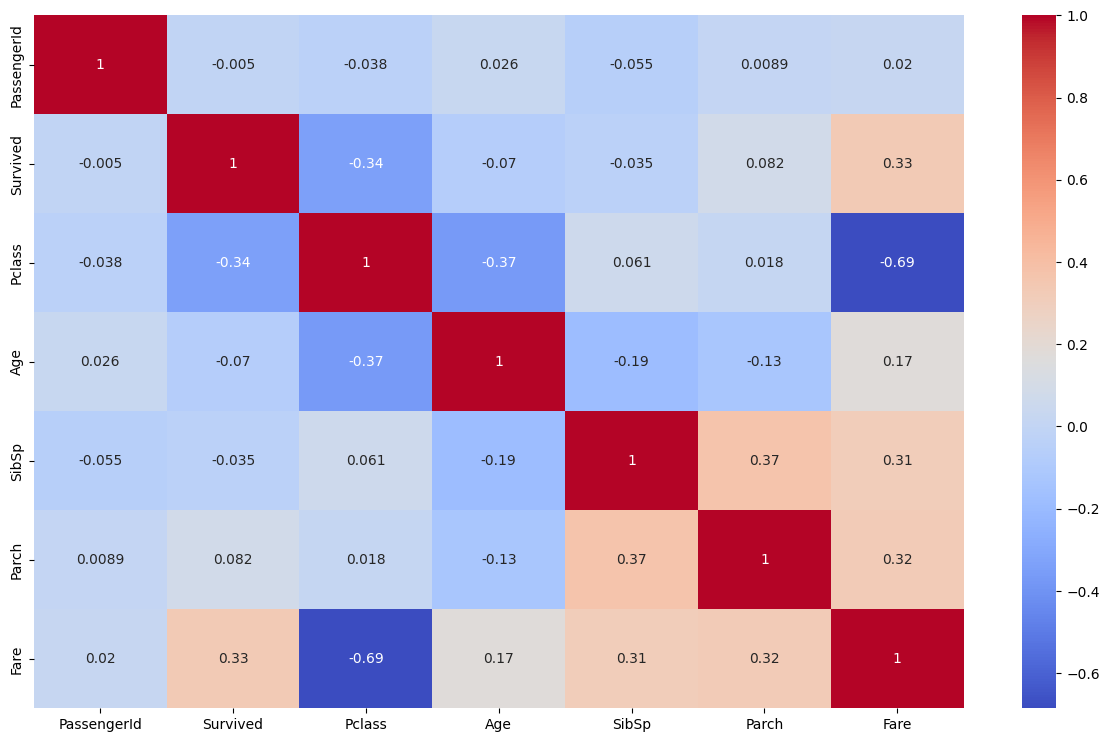

In [72]:
corr = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

`Dropping the unnecessary columns`

In [75]:
df = df.drop(columns= ['Name', 'Ticket'], axis = 1)

In [76]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# Label Encoding


---
Converting the categorical data into numerical like sex ratio


In [77]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

In [79]:
for col in cols:
  df[col] = le.fit_transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


# Spliting the Training and Testing Data

In [80]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [81]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [82]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [96]:
X = train.drop(columns = ['PassengerId','Survived'], axis = 1) #input
y = train['Survived'] #output

In [97]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Training

---

Classifier
cv = cross validation score

In [116]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify columns
def classify(model):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)
  model.fit(X_train, y_train)
  print('Accuracy: ', model.score(X_test, y_test)*100)

  score = cross_val_score(model, X, y, cv = 5)
  print(score)
  print('CV Score: ', np.mean(score)*100)


`Comparing all the models for getting the best accuracy which is be reasonable`

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy:  80.71748878923766
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
CV Score:  78.33971502102818


In [118]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy:  72.19730941704036
[0.73184358 0.76966292 0.79775281 0.74719101 0.80898876]
CV Score:  77.10878162073944


In [121]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy:  80.71748878923766
[0.75977654 0.79213483 0.84831461 0.78089888 0.85393258]
CV Score:  80.70114870378508


In [123]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy:  79.37219730941703
[0.77653631 0.76966292 0.83707865 0.76966292 0.82022472]
CV Score:  79.46331052664615


In [124]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy:  78.9237668161435
[0.7877095  0.81460674 0.84269663 0.78651685 0.83146067]
CV Score:  81.25980792166217


# Completing the model traing the full data

- Here I had used the RandomForestClassifier as the validation Score gains up to the 83 % of Accuracy

In [129]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [130]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [134]:
X_test = test.drop(columns = ['PassengerId','Survived'], axis = 1) #input split for the test data

In [135]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [136]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

# Submit Predictions

In [137]:
sub = pd.read_csv('https://raw.githubusercontent.com/YashrajMishra6190/DATASETS/main/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [141]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [142]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [143]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [144]:
sub.to_csv('SubmissionResult.csv', index = False)

In [145]:
sub_re = pd.read_csv('SubmissionResult.csv')

# Conclusion

---

Here, I had trained different models but due to the Accuracy of the RandomForestClassifier was High which gives me every time 80+ percent of accuracy result.
So, My Objective is completed to predict the Titanic Passenger Survival

Model Trained : `RandomForestClassifier`

Model Accuracy : `81 %`

`Note: `
*Here, Accuracy may get in the range between 80 to 86 %*


In [146]:
sub_re.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
